In [1]:
%run functions.ipynb

### In this section we will try to improve the model by checking the performance of few model and parameters

In [2]:
import codecs
import math
import random
import string
import time
import numpy as np
import torch
from sklearn.metrics import accuracy_score

'''
Don't change these constants for the classification task.
You may use different copies for the sentence generation model.
'''
languages = ["af", "cn", "de", "fi", "fr", "in", "ir", "pk", "za"]
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)


import unicodedata

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []
category_lines_test = {}
all_categories_test = []
# Read a file and split into lines
def readLines(filename):
    lines = codecs.open(filename, "r",encoding='utf-8', errors='ignore').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

In [3]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/cities/train/*.txt'))


for filename in findFiles('data/cities/train/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines
n_categories= len(all_categories)

['data/cities/train/in.txt', 'data/cities/train/pk.txt', 'data/cities/train/fr.txt', 'data/cities/train/af.txt', 'data/cities/train/cn.txt', 'data/cities/train/za.txt', 'data/cities/train/fi.txt', 'data/cities/train/ir.txt', 'data/cities/train/de.txt']


In [4]:
for filename in findFiles('data/cities/val/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories_test.append(category)
    lines = readLines(filename)
    category_lines_test[category] = lines
n_categories_test= len(all_categories_test)

# rnn model
### learning rate=0.001

5000 5% (0m 9s) 2.1996 iperin / fi ✗ (in)
10000 10% (0m 18s) 2.1181 abdur rehman / pk ✓
15000 15% (0m 27s) 1.9964 concellette / fr ✓
20000 20% (0m 37s) 2.1553 howz mahi / pk ✗ (ir)
25000 25% (0m 47s) 2.1066 khvosh makan / cn ✗ (ir)
30000 30% (0m 56s) 2.1339 kamarady / af ✗ (ir)
35000 35% (1m 6s) 1.9446 dainyarbanj / pk ✓
40000 40% (1m 15s) 1.3650 karamzarak / af ✗ (za)
45000 45% (1m 24s) 0.8817 gaza'i kalan / af ✓
50000 50% (1m 34s) 1.8163 santa maria traspontina / fi ✗ (in)
55000 55% (1m 43s) 1.4533 iso mottola / fi ✓
60000 60% (1m 53s) 1.8976 tjotkafiraton / cn ✗ (ir)
65000 65% (2m 2s) 1.4380 lizanovo / za ✓
70000 70% (2m 10s) 1.0003 jiangduo / cn ✓
75000 75% (2m 19s) 3.6437 chak seventyfive m / fi ✗ (pk)
80000 80% (2m 28s) 2.1348 abu dellum al ama / af ✗ (de)
85000 85% (2m 37s) 1.4416 komossa / fi ✓
90000 90% (2m 45s) 0.6455 dudesti / de ✓
95000 95% (2m 54s) 1.5879 hommerdingen / de ✗ (in)
100000 100% (3m 3s) 2.0386 veliko krusince / fr ✗ (in)


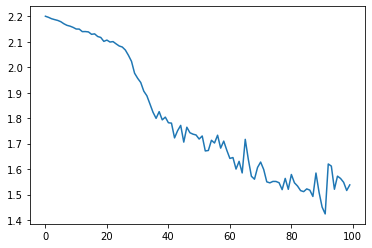

In [5]:
#train on rnn
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)
train_model(all_categories,category_lines,rnn,learning_rate=0.001)

<ipython-input-1-7ca7a2e87315>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-1-7ca7a2e87315>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


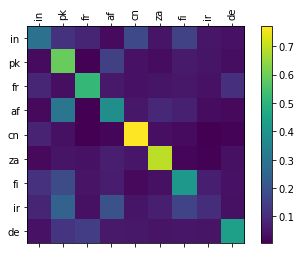

confusion= tensor([[0.2919, 0.1185, 0.0863, 0.0275, 0.1754, 0.0493, 0.1545, 0.0531, 0.0436],
        [0.0272, 0.5931, 0.0088, 0.1520, 0.0439, 0.0316, 0.0615, 0.0475, 0.0343],
        [0.0883, 0.0371, 0.5154, 0.0574, 0.0441, 0.0485, 0.0556, 0.0441, 0.1094],
        [0.0236, 0.3073, 0.0073, 0.3826, 0.0544, 0.0943, 0.0734, 0.0308, 0.0263],
        [0.0814, 0.0411, 0.0082, 0.0146, 0.7715, 0.0384, 0.0265, 0.0055, 0.0128],
        [0.0243, 0.0494, 0.0416, 0.0694, 0.0520, 0.6938, 0.0191, 0.0113, 0.0390],
        [0.1139, 0.1805, 0.0465, 0.0675, 0.0255, 0.0401, 0.4139, 0.0702, 0.0419],
        [0.0860, 0.2465, 0.0412, 0.1965, 0.0500, 0.0711, 0.1632, 0.1053, 0.0404],
        [0.0423, 0.1205, 0.1435, 0.0580, 0.0543, 0.0460, 0.0524, 0.0460, 0.4370]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.36      0.29      0.32      1055
         1.0       0.36      0.59      0.45      1138
         2.0       0.58      0.52      0.55      1133
         

In [6]:
#evaluate model on the training set
evaluate_model(all_categories,category_lines,rnn)

<ipython-input-1-7ca7a2e87315>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-1-7ca7a2e87315>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


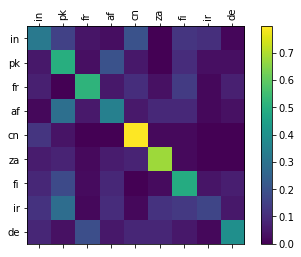

confusion= tensor([[0.3231, 0.1538, 0.0462, 0.0308, 0.2000, 0.0000, 0.1231, 0.1077, 0.0154],
        [0.0500, 0.5000, 0.0333, 0.2000, 0.0500, 0.0000, 0.1000, 0.0333, 0.0333],
        [0.0690, 0.0000, 0.5172, 0.0517, 0.1034, 0.0345, 0.1379, 0.0172, 0.0690],
        [0.0182, 0.2909, 0.0545, 0.3455, 0.0545, 0.0909, 0.0909, 0.0182, 0.0364],
        [0.1224, 0.0408, 0.0000, 0.0000, 0.7959, 0.0204, 0.0204, 0.0000, 0.0000],
        [0.0600, 0.0800, 0.0200, 0.0600, 0.0800, 0.6800, 0.0200, 0.0000, 0.0000],
        [0.0889, 0.1778, 0.0222, 0.0889, 0.0000, 0.0222, 0.4889, 0.0444, 0.0667],
        [0.1167, 0.2833, 0.0167, 0.1000, 0.0167, 0.1167, 0.1333, 0.1667, 0.0500],
        [0.0862, 0.0345, 0.1897, 0.0517, 0.0862, 0.0862, 0.0517, 0.0172, 0.3966]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.39      0.32      0.35        65
         1.0       0.34      0.50      0.40        60
         2.0       0.58      0.52      0.55        58
         

In [7]:
#evaluate model on the validation set
evaluate_model(all_categories_test,category_lines_test,rnn,500)

### learning rate=0.005

5000 5% (0m 9s) 2.3396 saintcadou / cn ✗ (fr)
10000 10% (0m 18s) 3.3964 goth vadero ismail katiar / ir ✗ (de)
15000 15% (0m 27s) 2.1551 tocoire / fr ✗ (ir)
20000 20% (0m 37s) 1.4170 qaskoh / af ✓
25000 25% (0m 46s) 1.2901 hajji darvish / ir ✓
30000 30% (0m 54s) nan kirnatseny / in ✗ (ir)
35000 35% (1m 3s) nan gonzalez moreno / in ✗ (za)
40000 40% (1m 11s) nan pijiahe / in ✗ (cn)
45000 45% (1m 20s) nan xinchangshang / in ✗ (cn)
50000 50% (1m 29s) nan kafr elkabaysh / in ✗ (fr)
55000 55% (1m 38s) nan demasan / in ✗ (de)
60000 60% (1m 47s) nan bunakovo shupinskoye / in ✓
65000 65% (1m 56s) nan bellefond / in ✗ (fr)
70000 70% (2m 9s) nan tahiri / in ✗ (ir)
75000 75% (2m 18s) nan kafaket / in ✗ (af)
80000 80% (2m 27s) nan debszczyzna / in ✗ (de)
85000 85% (2m 36s) nan chel / in ✗ (ir)
90000 90% (2m 46s) nan dhaimilgol / in ✗ (pk)
95000 95% (2m 56s) nan shahbaz khan chachar / in ✗ (pk)
100000 100% (3m 6s) nan khwaja sahab / in ✗ (af)


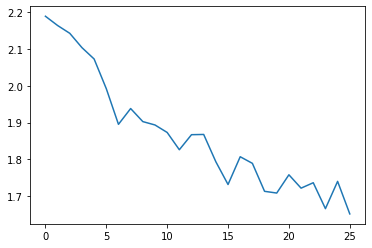

In [8]:
#train on rnn with a bigger learning rate
n_hidden = 128
rnn2 = RNN(n_letters, n_hidden, n_categories)
train_model(all_categories,category_lines,rnn2,learning_rate=0.005)

### learning rate=0.0005

5000 5% (0m 9s) 2.1747 naapurivaara / za ✗ (fi)
10000 10% (0m 18s) 2.0985 taoyuen / cn ✓
15000 15% (0m 29s) 2.1341 zagaynova / fi ✗ (za)
20000 20% (0m 39s) 2.1186 cadir / in ✗ (ir)
25000 25% (0m 49s) 2.0640 lalian di basti / pk ✓
30000 30% (0m 59s) 2.2241 arawali camp / de ✗ (pk)
35000 35% (1m 9s) 2.1561 kiffis / fr ✗ (fi)
40000 40% (1m 19s) 2.1097 dokofi / pk ✗ (fi)
45000 45% (1m 28s) 2.1993 kleinaga / fi ✗ (de)
50000 50% (1m 39s) 1.5539 achalwali / pk ✓
55000 55% (1m 48s) 2.1231 saintejammessursarthe / fr ✗ (in)
60000 60% (1m 58s) 2.1384 fraulund / in ✗ (fr)
65000 65% (2m 7s) 1.3617 houpuling / cn ✓
70000 70% (2m 16s) 1.2876 moelfre / fr ✓
75000 75% (2m 25s) 1.6719 shahre kord / af ✗ (ir)
80000 80% (2m 34s) 2.0592 tubujia qu / af ✗ (cn)
85000 85% (2m 42s) 1.5628 shichaomen / cn ✓
90000 90% (2m 51s) 2.0003 haselhorn / ir ✗ (de)
95000 95% (3m 0s) 1.4426 chupina / in ✓
100000 100% (3m 9s) 2.2220 mina quinto del hierro / de ✗ (in)


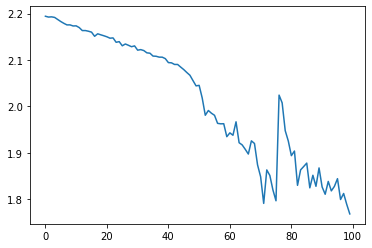

In [22]:
#train on rnn
n_hidden = 128
rnn3 = RNN(n_letters, n_hidden, n_categories)
train_model(all_categories,category_lines,rnn3,learning_rate=0.0005)

<ipython-input-1-7ca7a2e87315>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-1-7ca7a2e87315>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


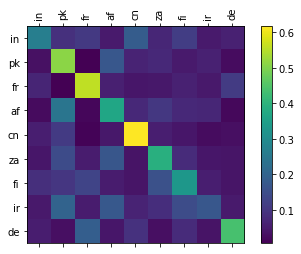

confusion= tensor([[0.2673, 0.0907, 0.1073, 0.0509, 0.1850, 0.0703, 0.1166, 0.0509, 0.0611],
        [0.0332, 0.5112, 0.0063, 0.1713, 0.0655, 0.0753, 0.0493, 0.0610, 0.0269],
        [0.0680, 0.0055, 0.5588, 0.0588, 0.0423, 0.0450, 0.0616, 0.0478, 0.1121],
        [0.0236, 0.2437, 0.0163, 0.3678, 0.0770, 0.1051, 0.0752, 0.0725, 0.0190],
        [0.0575, 0.1098, 0.0113, 0.0462, 0.6185, 0.0575, 0.0436, 0.0253, 0.0305],
        [0.0415, 0.1465, 0.0512, 0.1686, 0.0380, 0.3919, 0.0812, 0.0415, 0.0397],
        [0.0876, 0.1024, 0.1301, 0.0526, 0.0406, 0.1577, 0.3303, 0.0581, 0.0406],
        [0.0482, 0.2009, 0.0526, 0.1746, 0.0675, 0.0860, 0.1482, 0.1728, 0.0491],
        [0.0542, 0.0307, 0.1897, 0.0434, 0.0939, 0.0298, 0.0813, 0.0370, 0.4399]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.39      0.27      0.32      1081
         1.0       0.35      0.51      0.42      1115
         2.0       0.49      0.56      0.52      1088
         

In [27]:
#evaluate model on the training set
evaluate_model(all_categories,category_lines,rnn3)

<ipython-input-1-7ca7a2e87315>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-1-7ca7a2e87315>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


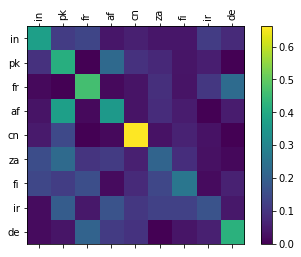

confusion= tensor([[0.3725, 0.1176, 0.1373, 0.0392, 0.0588, 0.0392, 0.0392, 0.1176, 0.0784],
        [0.0943, 0.4151, 0.0000, 0.2264, 0.0943, 0.0755, 0.0377, 0.0566, 0.0000],
        [0.0179, 0.0000, 0.4643, 0.0179, 0.0357, 0.0893, 0.0357, 0.1071, 0.2321],
        [0.0339, 0.3729, 0.0169, 0.3559, 0.0339, 0.0847, 0.0508, 0.0000, 0.0508],
        [0.0484, 0.1452, 0.0000, 0.0161, 0.6613, 0.0323, 0.0645, 0.0323, 0.0000],
        [0.1571, 0.2286, 0.1000, 0.1143, 0.0571, 0.2143, 0.0857, 0.0286, 0.0143],
        [0.1400, 0.1200, 0.1600, 0.0200, 0.0800, 0.1400, 0.2600, 0.0200, 0.0600],
        [0.0213, 0.1915, 0.0426, 0.1702, 0.1064, 0.1277, 0.1277, 0.1702, 0.0426],
        [0.0192, 0.0385, 0.2115, 0.1154, 0.0962, 0.0000, 0.0385, 0.0577, 0.4231]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.38      0.37      0.38        51
         1.0       0.24      0.42      0.30        53
         2.0       0.42      0.46      0.44        56
         

In [28]:
#evaluate model on the validation set
evaluate_model(all_categories_test,category_lines_test,rnn3,500)

# rnn with dropout
### learning rate=0.001

5000 5% (0m 14s) 2.0911 korzhaviny / in ✓
10000 10% (0m 27s) 2.3273 breyten / cn ✗ (za)
15000 15% (0m 41s) 2.3916 mustlax / af ✗ (fi)
20000 20% (0m 55s) 1.7987 englefontaine / fr ✓
25000 25% (1m 12s) 2.0596 le courtioux / fr ✓
30000 30% (1m 27s) 1.6764 urweiler / de ✓
35000 35% (1m 43s) 2.5888 nussau / cn ✗ (de)
40000 40% (1m 57s) 0.8964 emamzadehye kaka reza / za ✓
45000 45% (2m 11s) 1.6635 porte sainteanne / in ✗ (fr)
50000 50% (2m 25s) 2.1315 koffi amoukro / za ✗ (fi)
55000 55% (2m 38s) 3.0483 lipkovskiy / in ✗ (pk)
60000 60% (2m 51s) 1.9910 zardalugakbuya / za ✗ (af)
65000 65% (3m 4s) 1.4712 linh xuan / cn ✗ (in)
70000 70% (3m 18s) 2.2535 haimps / pk ✗ (fr)
75000 75% (3m 32s) 0.0701 hamzazai / za ✓
80000 80% (3m 46s) 0.5489 dampierredel'aube / fr ✓
85000 85% (4m 0s) 1.0983 finca santa lucia / fi ✓
90000 90% (4m 13s) 1.2079 ruspen / fr ✗ (de)
95000 95% (4m 27s) 2.5870 paradela / fi ✗ (de)
100000 100% (4m 40s) 1.1305 keli gal / af ✓


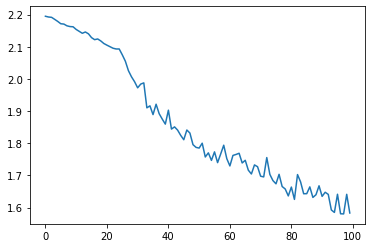

In [11]:
#train on rnn_dropout
n_hidden = 128
rnn_dropout = RNN_dropout(n_letters, n_hidden, n_categories)
train_model(all_categories,category_lines,rnn_dropout,learning_rate=0.001)

<ipython-input-1-7ca7a2e87315>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-1-7ca7a2e87315>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


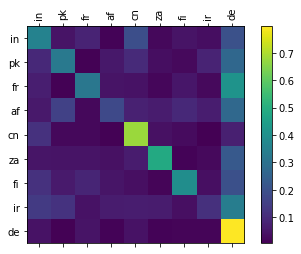

confusion= tensor([[0.3564, 0.0464, 0.0855, 0.0136, 0.1955, 0.0209, 0.0473, 0.0336, 0.2009],
        [0.0956, 0.3273, 0.0090, 0.0559, 0.0983, 0.0352, 0.0243, 0.0857, 0.2687],
        [0.0714, 0.0107, 0.3185, 0.0464, 0.0437, 0.0196, 0.0517, 0.0250, 0.4130],
        [0.0593, 0.1597, 0.0227, 0.1798, 0.0768, 0.0646, 0.0951, 0.0681, 0.2740],
        [0.1172, 0.0234, 0.0226, 0.0113, 0.6788, 0.0399, 0.0278, 0.0052, 0.0738],
        [0.0490, 0.0481, 0.0481, 0.0409, 0.0645, 0.4859, 0.0136, 0.0245, 0.2252],
        [0.1168, 0.0626, 0.0874, 0.0506, 0.0368, 0.0156, 0.3937, 0.0386, 0.1978],
        [0.1391, 0.1221, 0.0440, 0.0664, 0.0691, 0.0664, 0.0377, 0.1149, 0.3402],
        [0.0449, 0.0093, 0.0458, 0.0121, 0.0449, 0.0140, 0.0150, 0.0159, 0.7981]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.34      0.36      0.35      1100
         1.0       0.40      0.33      0.36      1109
         2.0       0.47      0.32      0.38      1121
         

In [12]:
#evaluate model on the training set
evaluate_model(all_categories,category_lines,rnn_dropout)

<ipython-input-1-7ca7a2e87315>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-1-7ca7a2e87315>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


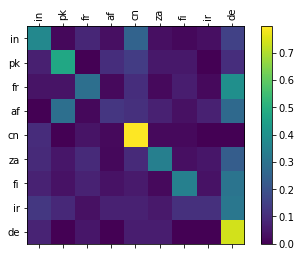

confusion= tensor([[0.3729, 0.0169, 0.0847, 0.0339, 0.2542, 0.0339, 0.0169, 0.0339, 0.1525],
        [0.0702, 0.4737, 0.0000, 0.1053, 0.1404, 0.0526, 0.0526, 0.0000, 0.1053],
        [0.0417, 0.0417, 0.2917, 0.0208, 0.1042, 0.0208, 0.0625, 0.0208, 0.3958],
        [0.0000, 0.2909, 0.0182, 0.1273, 0.1091, 0.0727, 0.0364, 0.0727, 0.2727],
        [0.1020, 0.0000, 0.0408, 0.0204, 0.7959, 0.0204, 0.0204, 0.0000, 0.0000],
        [0.0938, 0.0469, 0.0938, 0.0156, 0.0938, 0.3438, 0.0312, 0.0469, 0.2344],
        [0.0769, 0.0385, 0.0769, 0.0385, 0.0577, 0.0192, 0.3462, 0.0385, 0.3077],
        [0.1296, 0.0926, 0.0370, 0.0741, 0.0741, 0.0556, 0.1111, 0.1111, 0.3148],
        [0.0806, 0.0000, 0.0484, 0.0000, 0.0645, 0.0645, 0.0000, 0.0000, 0.7419]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.40      0.37      0.39        59
         1.0       0.48      0.47      0.48        57
         2.0       0.38      0.29      0.33        48
         

In [13]:
#evaluate model on the validation set
evaluate_model(all_categories_test,category_lines_test,rnn_dropout,500)

### learning rate=0.005

5000 5% (0m 13s) 1.6751 fiumedinisi / de ✗ (fi)
10000 10% (0m 27s) 1.7370 senfi / fi ✓
15000 15% (0m 41s) 2.1245 basti jam godha / za ✗ (pk)
20000 20% (0m 55s) 1.0398 kenafif / fi ✓
25000 25% (1m 9s) 1.6035 kolonfinn / in ✗ (fi)
30000 30% (1m 27s) 0.4727 shamali alizai / za ✓
35000 35% (1m 43s) 0.7770 vincent / fr ✓
40000 40% (2m 0s) 1.7811 lailishi / pk ✗ (cn)
45000 45% (2m 14s) 3.7812 karezizamanikaigandi / cn ✗ (af)
50000 50% (2m 28s) 2.3921 lunggar / cn ✗ (pk)
55000 55% (2m 41s) 1.8271 sitio valfrido p. collaco / de ✗ (fr)
60000 60% (2m 53s) 2.7913 beka / de ✗ (pk)
65000 65% (3m 6s) 2.0838 mahlpfuhl / fi ✗ (de)
70000 70% (3m 20s) 0.8093 siestedt / de ✓
75000 75% (3m 34s) 2.1379 bholar / af ✗ (pk)
80000 80% (3m 47s) 0.3853 mahiafia / fi ✓
85000 85% (4m 0s) 1.2710 chak eightytwo tda / pk ✓
90000 90% (4m 13s) 1.1836 anarestaneh / ir ✓
95000 95% (4m 28s) 3.2803 qos arbabsirin / in ✗ (af)
100000 100% (4m 42s) 1.2932 hanji / cn ✓


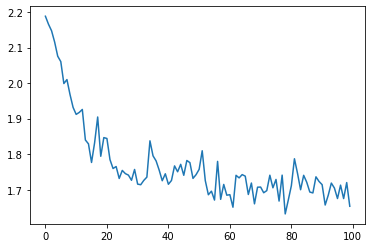

In [23]:
#train on rnn_dropout with a bigger learning rate
n_hidden = 128
rnn_dropout2 = RNN_dropout(n_letters, n_hidden, n_categories)
train_model(all_categories,category_lines,rnn_dropout2,learning_rate=0.005)

<ipython-input-1-7ca7a2e87315>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-1-7ca7a2e87315>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


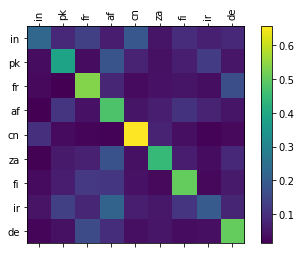

confusion= tensor([[0.2266, 0.0883, 0.1356, 0.0637, 0.1874, 0.0491, 0.0946, 0.0692, 0.0855],
        [0.0351, 0.3863, 0.0360, 0.1811, 0.0758, 0.0425, 0.0665, 0.1248, 0.0518],
        [0.0297, 0.0153, 0.5378, 0.0818, 0.0333, 0.0441, 0.0513, 0.0387, 0.1682],
        [0.0137, 0.1098, 0.0457, 0.4767, 0.0494, 0.0677, 0.1080, 0.0787, 0.0503],
        [0.1036, 0.0318, 0.0218, 0.0200, 0.6573, 0.0755, 0.0400, 0.0191, 0.0309],
        [0.0176, 0.0611, 0.0731, 0.1767, 0.0426, 0.4450, 0.0648, 0.0342, 0.0851],
        [0.0334, 0.0658, 0.1203, 0.1150, 0.0439, 0.0290, 0.5048, 0.0263, 0.0615],
        [0.0472, 0.1346, 0.0838, 0.2193, 0.0686, 0.0561, 0.1123, 0.1988, 0.0793],
        [0.0239, 0.0435, 0.1638, 0.0973, 0.0401, 0.0520, 0.0358, 0.0392, 0.5043]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.42      0.23      0.30      1099
         1.0       0.41      0.39      0.40      1082
         2.0       0.44      0.54      0.48      1112
         

In [29]:
#evaluate model on the training set
evaluate_model(all_categories,category_lines,rnn_dropout2)

<ipython-input-1-7ca7a2e87315>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-1-7ca7a2e87315>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


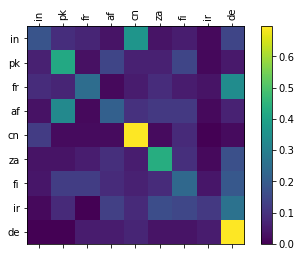

confusion= tensor([[0.1818, 0.0909, 0.0727, 0.0364, 0.3636, 0.0364, 0.0545, 0.0182, 0.1455],
        [0.0645, 0.4194, 0.0323, 0.1452, 0.0645, 0.0645, 0.1452, 0.0161, 0.0484],
        [0.0893, 0.0714, 0.2500, 0.0179, 0.0536, 0.0893, 0.0536, 0.0357, 0.3393],
        [0.0328, 0.3279, 0.0164, 0.2131, 0.0984, 0.1148, 0.1148, 0.0164, 0.0656],
        [0.1224, 0.0204, 0.0204, 0.0204, 0.6939, 0.0204, 0.0816, 0.0000, 0.0204],
        [0.0377, 0.0377, 0.0566, 0.0943, 0.0566, 0.4340, 0.0943, 0.0189, 0.1698],
        [0.0426, 0.1277, 0.1277, 0.0851, 0.0638, 0.0851, 0.2340, 0.0426, 0.1915],
        [0.0164, 0.0820, 0.0000, 0.1311, 0.0820, 0.1639, 0.1475, 0.1148, 0.2623],
        [0.0000, 0.0000, 0.0536, 0.0536, 0.0714, 0.0357, 0.0357, 0.0536, 0.6964]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.31      0.18      0.23        55
         1.0       0.38      0.42      0.40        62
         2.0       0.41      0.25      0.31        56
         

In [30]:
#evaluate model on the validation set
evaluate_model(all_categories_test,category_lines_test,rnn_dropout3,500)

### learning rate=0.0005

5000 5% (0m 13s) 2.2394 fair place / fr ✗ (ir)
10000 10% (0m 27s) 2.1519 laudenbach / de ✓
15000 15% (0m 40s) 2.1649 dzhafarabat / af ✓
20000 20% (0m 54s) 2.1530 kofia / ir ✗ (fi)
25000 25% (1m 8s) 2.1685 nanhantsun / fi ✗ (cn)
30000 30% (1m 23s) 2.2132 kafr elilw / za ✗ (fr)
35000 35% (1m 38s) 2.2764 kar degar kola / za ✗ (de)
40000 40% (1m 52s) 2.1323 saares / fr ✗ (fi)
45000 45% (2m 6s) 2.0187 batawe bala / fi ✗ (af)
50000 50% (2m 20s) 2.0148 kavasto / fi ✓
55000 55% (2m 34s) 2.0941 cheron / cn ✗ (fr)
60000 60% (2m 48s) 2.3342 wangmozi / pk ✗ (cn)
65000 65% (3m 2s) 1.9753 saintgrat / cn ✗ (fr)
70000 70% (3m 16s) 2.8109 bichhor / cn ✗ (pk)
75000 75% (3m 30s) 1.7727 firidaka / za ✗ (fi)
80000 80% (3m 43s) 1.5350 liuwu gongshe / cn ✓
85000 85% (3m 57s) 1.0112 les jubliers / fr ✓
90000 90% (4m 11s) 2.5967 rixu / fr ✗ (cn)
95000 95% (4m 23s) 1.6833 quimuanza langa / pk ✗ (za)
100000 100% (4m 38s) 1.8290 zamirkheyl' / pk ✗ (za)


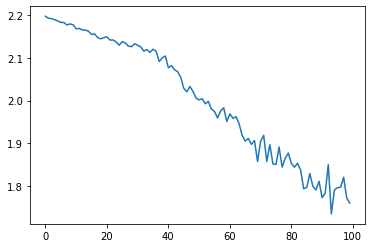

In [24]:
#train on rnn_dropout with a smaller learning rate
n_hidden = 128
rnn_dropout3 = RNN_dropout(n_letters, n_hidden, n_categories)
train_model(all_categories,category_lines,rnn_dropout3,learning_rate=0.0005)

<ipython-input-1-7ca7a2e87315>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-1-7ca7a2e87315>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


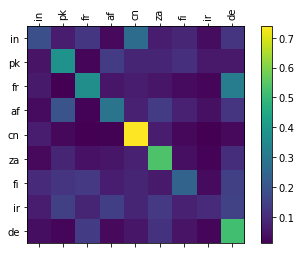

confusion= tensor([[0.1900, 0.0688, 0.1258, 0.0308, 0.2688, 0.0661, 0.0905, 0.0353, 0.1240],
        [0.0498, 0.3831, 0.0213, 0.1404, 0.0862, 0.0862, 0.1111, 0.0604, 0.0613],
        [0.0654, 0.0115, 0.3710, 0.0548, 0.0680, 0.0557, 0.0336, 0.0212, 0.3189],
        [0.0329, 0.1968, 0.0178, 0.2930, 0.0793, 0.1371, 0.0784, 0.0445, 0.1202],
        [0.0702, 0.0268, 0.0139, 0.0157, 0.7396, 0.0656, 0.0277, 0.0120, 0.0286],
        [0.0301, 0.0879, 0.0457, 0.0560, 0.0784, 0.5366, 0.0405, 0.0172, 0.1077],
        [0.0982, 0.1220, 0.1312, 0.0697, 0.0872, 0.0642, 0.2431, 0.0339, 0.1505],
        [0.0670, 0.1490, 0.0875, 0.1471, 0.0857, 0.1322, 0.0791, 0.0968, 0.1555],
        [0.0397, 0.0253, 0.1400, 0.0298, 0.0560, 0.1192, 0.0506, 0.0208, 0.5185]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.30      0.19      0.23      1105
         1.0       0.36      0.38      0.37      1125
         2.0       0.40      0.37      0.38      1132
         

In [31]:
#evaluate model on the training set
evaluate_model(all_categories,category_lines,rnn_dropout3)

<ipython-input-1-7ca7a2e87315>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-1-7ca7a2e87315>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


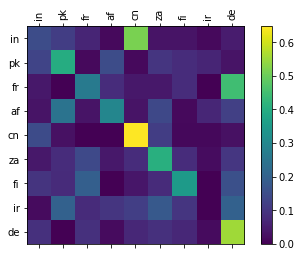

confusion= tensor([[0.1500, 0.1167, 0.0667, 0.0167, 0.5167, 0.0333, 0.0333, 0.0167, 0.0500],
        [0.1333, 0.4000, 0.0167, 0.1500, 0.0167, 0.1000, 0.0833, 0.0667, 0.0333],
        [0.0408, 0.0000, 0.2653, 0.0816, 0.0408, 0.0408, 0.0816, 0.0000, 0.4490],
        [0.0351, 0.2456, 0.0351, 0.2982, 0.0351, 0.1404, 0.0175, 0.0702, 0.1228],
        [0.1471, 0.0294, 0.0000, 0.0000, 0.6471, 0.1176, 0.0147, 0.0147, 0.0294],
        [0.0408, 0.0816, 0.1429, 0.0408, 0.0816, 0.4082, 0.0816, 0.0204, 0.1020],
        [0.0980, 0.0784, 0.1961, 0.0000, 0.0392, 0.0784, 0.3529, 0.0000, 0.1569],
        [0.0200, 0.2000, 0.0800, 0.1000, 0.1200, 0.1800, 0.1000, 0.0000, 0.2000],
        [0.0893, 0.0000, 0.0893, 0.0179, 0.0714, 0.0893, 0.0714, 0.0179, 0.5536]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.20      0.15      0.17        60
         1.0       0.37      0.40      0.38        60
         2.0       0.28      0.27      0.27        49
         

In [32]:
#evaluate model on the validation set
evaluate_model(all_categories_test,category_lines_test,rnn_dropout3,500)

## rnn model - the hidden is initialize to random value between 0 to 1
### learning rate=0.001

5000 5% (0m 10s) 2.0731 kusamsar / pk ✓
10000 10% (0m 19s) 2.0391 sukhdar / pk ✓
15000 15% (0m 29s) 2.2313 goth sabojo / in ✗ (pk)
20000 20% (0m 38s) 2.2640 kazanlik / in ✗ (za)
25000 25% (0m 48s) 1.5797 kafr elagayza / af ✗ (za)
30000 30% (0m 58s) 2.0210 dehe sefid / in ✗ (fi)
35000 35% (1m 7s) 2.2041 demuzaine / in ✗ (za)
40000 40% (1m 16s) 1.7026 zabrodskoye / za ✓
45000 45% (1m 26s) 1.3799 desconsierto / fr ✗ (de)
50000 50% (1m 35s) 1.3435 fragne grande / fr ✗ (de)
55000 55% (1m 45s) 1.9889 nodo baran / af ✗ (pk)
60000 60% (1m 55s) 2.3179 cavigny / in ✗ (fr)
65000 65% (2m 5s) 1.9051 tsolokasi / ir ✗ (za)
70000 70% (2m 15s) 1.8891 niuvanniemi / cn ✗ (fi)
75000 75% (2m 24s) 3.6874 harefield / fi ✗ (za)
80000 80% (2m 33s) 0.8187 ghulam nabi rind / in ✓
85000 85% (2m 41s) 1.6153 siah kucheh / af ✗ (ir)
90000 90% (2m 51s) 1.9862 tetom / fr ✗ (fi)
95000 95% (3m 0s) 1.3171 pinnagolla / fi ✗ (in)
100000 100% (3m 9s) 0.7818 dubay / af ✓


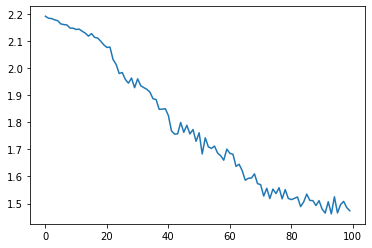

In [16]:
#train on rnn_noZeroInit
n_hidden = 128
rnn_noZeroInit = RNN_noZeroInit(n_letters, n_hidden, n_categories)
train_model(all_categories,category_lines,rnn_noZeroInit,learning_rate=0.001)

<ipython-input-1-7ca7a2e87315>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-1-7ca7a2e87315>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


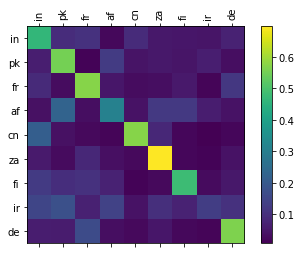

confusion= tensor([[0.4664, 0.0957, 0.1049, 0.0212, 0.0929, 0.0515, 0.0497, 0.0451, 0.0727],
        [0.0644, 0.5553, 0.0131, 0.1271, 0.0444, 0.0513, 0.0461, 0.0644, 0.0339],
        [0.0897, 0.0308, 0.5743, 0.0498, 0.0308, 0.0335, 0.0553, 0.0163, 0.1196],
        [0.0390, 0.2272, 0.0328, 0.3114, 0.0417, 0.1233, 0.1216, 0.0612, 0.0417],
        [0.2150, 0.0381, 0.0239, 0.0168, 0.5743, 0.0850, 0.0195, 0.0071, 0.0204],
        [0.0563, 0.0263, 0.0854, 0.0363, 0.0236, 0.6994, 0.0182, 0.0145, 0.0400],
        [0.1248, 0.0963, 0.1064, 0.0734, 0.0138, 0.0248, 0.4817, 0.0266, 0.0523],
        [0.1511, 0.1772, 0.0701, 0.1448, 0.0414, 0.1016, 0.0746, 0.1331, 0.1061],
        [0.0618, 0.0609, 0.1655, 0.0327, 0.0245, 0.0491, 0.0218, 0.0173, 0.5664]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.36      0.47      0.41      1087
         1.0       0.43      0.56      0.49      1149
         2.0       0.49      0.57      0.53      1104
         

In [17]:
#evaluate model on the training set
evaluate_model(all_categories,category_lines,rnn_noZeroInit)

<ipython-input-1-7ca7a2e87315>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-1-7ca7a2e87315>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


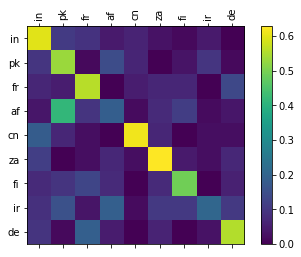

confusion= tensor([[0.6000, 0.1077, 0.0923, 0.0462, 0.0615, 0.0308, 0.0154, 0.0462, 0.0000],
        [0.0968, 0.5323, 0.0161, 0.1452, 0.0645, 0.0000, 0.0323, 0.0968, 0.0161],
        [0.0678, 0.0508, 0.5593, 0.0000, 0.0508, 0.0678, 0.0678, 0.0000, 0.1356],
        [0.0377, 0.4151, 0.0943, 0.1887, 0.0189, 0.0755, 0.1132, 0.0189, 0.0377],
        [0.1818, 0.0682, 0.0227, 0.0000, 0.6136, 0.0682, 0.0000, 0.0227, 0.0227],
        [0.1163, 0.0000, 0.0233, 0.0698, 0.0233, 0.6279, 0.0465, 0.0233, 0.0698],
        [0.0755, 0.0943, 0.1321, 0.0755, 0.0000, 0.0755, 0.4906, 0.0000, 0.0566],
        [0.0862, 0.1552, 0.0345, 0.1897, 0.0172, 0.1034, 0.1034, 0.2069, 0.1034],
        [0.0952, 0.0159, 0.1905, 0.0476, 0.0000, 0.0635, 0.0000, 0.0317, 0.5556]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.49      0.60      0.54        65
         1.0       0.40      0.53      0.46        62
         2.0       0.49      0.56      0.52        59
         

In [18]:
#evaluate model on the validation set
evaluate_model(all_categories_test,category_lines_test,rnn_noZeroInit,500)

### learning rate=0.005

5000 5% (0m 9s) 2.0361 prauschdorf / de ✗ (fr)
10000 10% (0m 18s) 0.8747 gangshou / cn ✓
15000 15% (0m 27s) 0.8099 walnut point / in ✓
20000 20% (0m 37s) 0.9916 kokhak / af ✓
25000 25% (0m 48s) nan rafael perazza / in ✗ (af)
30000 30% (0m 58s) nan wipperfeld / in ✗ (de)
35000 35% (1m 9s) nan punmira / in ✗ (ir)
40000 40% (1m 19s) nan periyakudirippu / in ✗ (ir)
45000 45% (1m 29s) nan la croisillesurbriance / in ✗ (fr)
50000 50% (1m 40s) nan sayyed bows / in ✗ (af)
55000 55% (1m 53s) nan hajji mosayyeb / in ✗ (ir)
60000 60% (2m 4s) nan zaykha'ida / in ✗ (za)
65000 65% (2m 13s) nan dishengang / in ✗ (cn)
70000 70% (2m 22s) nan nanxi linchang / in ✓
75000 75% (2m 31s) nan kandeh sang / in ✗ (af)
80000 80% (2m 41s) nan basti tanwriwali / in ✗ (pk)
85000 85% (2m 50s) nan altenlinde / in ✓
90000 90% (3m 0s) nan kuqoba / in ✗ (za)
95000 95% (3m 9s) nan zameshaikha / in ✗ (za)
100000 100% (3m 18s) nan shuize / in ✗ (cn)


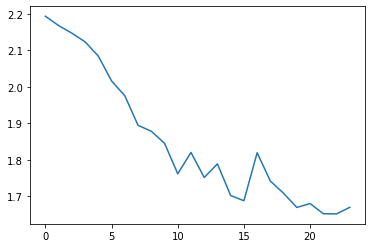

In [25]:
#train on rnn_noZeroInit with a bigger learning rate
n_hidden = 128
rnn_noZeroInit2 = RNN_noZeroInit(n_letters, n_hidden, n_categories)
train_model(all_categories,category_lines,rnn_noZeroInit2,learning_rate=0.005)

### learning rate=0.0005

5000 5% (0m 9s) 2.1919 qaleh qaziye olya / pk ✗ (ir)
10000 10% (0m 19s) 2.1184 ban chin kong / cn ✗ (in)
15000 15% (0m 29s) 2.1372 zarai mora / pk ✗ (za)
20000 20% (0m 39s) 2.1414 wambercourt / pk ✗ (fr)
25000 25% (0m 49s) 2.2348 sefid kareh / de ✗ (fi)
30000 30% (0m 59s) 2.1774 padubinge / fr ✗ (in)
35000 35% (1m 9s) 2.1238 hinteraichhalden / cn ✗ (de)
40000 40% (1m 19s) 2.0817 sidi bou zacouma / fi ✗ (za)
45000 45% (1m 29s) 1.8217 ismiyah / af ✓
50000 50% (1m 40s) 2.3297 honsnas / af ✗ (fi)
55000 55% (1m 50s) 1.5352 tangwangying / cn ✓
60000 60% (1m 59s) 2.1896 kirikli ciftligi / in ✗ (ir)
65000 65% (2m 7s) 1.1523 leidersdorf / de ✓
70000 70% (2m 16s) 1.9843 ber / ir ✗ (pk)
75000 75% (2m 25s) 1.1463 chak  / pk ✓
80000 80% (2m 34s) 1.1541 aw kalan / af ✓
85000 85% (2m 43s) 2.7947 ottischhof / cn ✗ (de)
90000 90% (2m 52s) 1.7334 shabshir al hissah / af ✗ (ir)
95000 95% (3m 1s) 2.2785 montmirail / in ✗ (fr)
100000 100% (3m 10s) 1.0826 changrencun / cn ✓


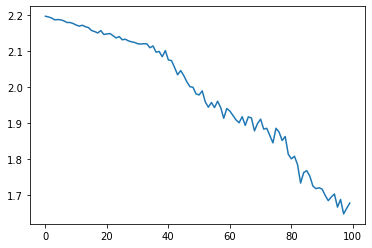

In [26]:
#train on rnn_noZeroInit with a bigger learning rate
n_hidden = 128
rnn_noZeroInit3 = RNN_noZeroInit(n_letters, n_hidden, n_categories)
train_model(all_categories,category_lines,rnn_noZeroInit3,learning_rate=0.0005)

<ipython-input-1-7ca7a2e87315>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-1-7ca7a2e87315>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


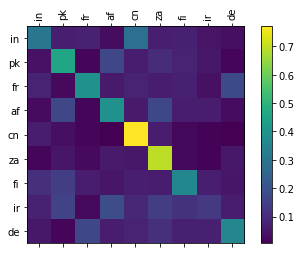

confusion= tensor([[0.3069, 0.0692, 0.0774, 0.0301, 0.2869, 0.0701, 0.0738, 0.0474, 0.0383],
        [0.0437, 0.4576, 0.0152, 0.1677, 0.0651, 0.1035, 0.0785, 0.0535, 0.0152],
        [0.0802, 0.0258, 0.3975, 0.0615, 0.0775, 0.0660, 0.0731, 0.0410, 0.1774],
        [0.0287, 0.1697, 0.0162, 0.3923, 0.0601, 0.1724, 0.0646, 0.0646, 0.0314],
        [0.0632, 0.0381, 0.0149, 0.0084, 0.7723, 0.0641, 0.0214, 0.0121, 0.0056],
        [0.0179, 0.0528, 0.0260, 0.0600, 0.0564, 0.6965, 0.0233, 0.0134, 0.0537],
        [0.1130, 0.1470, 0.0635, 0.0522, 0.0696, 0.0678, 0.3626, 0.0713, 0.0530],
        [0.0763, 0.1628, 0.0242, 0.1879, 0.0912, 0.1442, 0.1181, 0.1321, 0.0633],
        [0.0559, 0.0151, 0.1686, 0.0648, 0.0781, 0.1109, 0.0736, 0.0736, 0.3594]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.39      0.31      0.34      1098
         1.0       0.40      0.46      0.43      1121
         2.0       0.50      0.40      0.44      1122
         

In [33]:
#evaluate model on the training set
evaluate_model(all_categories,category_lines,rnn_noZeroInit3)

<ipython-input-1-7ca7a2e87315>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-1-7ca7a2e87315>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


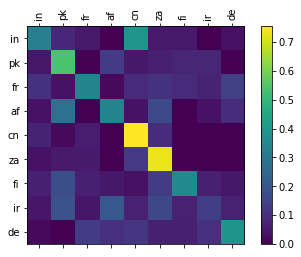

confusion= tensor([[0.3276, 0.0862, 0.0517, 0.0000, 0.3966, 0.0517, 0.0517, 0.0000, 0.0345],
        [0.0492, 0.5410, 0.0000, 0.1311, 0.0492, 0.0656, 0.0820, 0.0820, 0.0000],
        [0.1071, 0.0357, 0.3393, 0.0179, 0.0893, 0.1071, 0.0893, 0.0714, 0.1429],
        [0.0377, 0.2830, 0.0000, 0.3396, 0.0377, 0.1698, 0.0000, 0.0377, 0.0943],
        [0.0755, 0.0189, 0.0566, 0.0000, 0.7547, 0.0943, 0.0000, 0.0000, 0.0000],
        [0.0357, 0.0536, 0.0536, 0.0000, 0.1250, 0.7321, 0.0000, 0.0000, 0.0000],
        [0.0656, 0.1803, 0.0656, 0.0492, 0.0328, 0.1311, 0.3607, 0.0656, 0.0492],
        [0.0465, 0.1860, 0.0465, 0.2093, 0.0698, 0.1628, 0.0698, 0.1395, 0.0698],
        [0.0169, 0.0000, 0.1356, 0.1017, 0.1186, 0.0678, 0.0678, 0.1017, 0.3898]])
classtification report:
              precision    recall  f1-score   support

         0.0       0.44      0.33      0.38        58
         1.0       0.42      0.54      0.47        61
         2.0       0.45      0.34      0.39        56
         

In [34]:
#evaluate model on the validation set
evaluate_model(all_categories_test,category_lines_test,rnn_noZeroInit3,500)

we can see that with a learning rate of 0.005 we arrive very quickly to nan values and then the model didn't learn anything